<a href="https://colab.research.google.com/github/mukeshsharma1981/ML-Projects/blob/main/5_ML_Logistic_Regression_Using_Naive_Bayes_cross_validation_PowerTransformer_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Library Pandas

In [59]:
import pandas as pd
col_names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
df=pd.read_csv('/content/diabetes.csv', names=col_names)
df=df.drop(df.index[0])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   preg    768 non-null    object
 1   plas    768 non-null    object
 2   pres    768 non-null    object
 3   skin    768 non-null    object
 4   test    768 non-null    object
 5   mass    768 non-null    object
 6   pedi    768 non-null    object
 7   age     768 non-null    object
 8   class   768 non-null    object
dtypes: object(9)
memory usage: 60.0+ KB


In [60]:
convert_dict = {'preg' : int,
                'plas' : int,
                'pres' : int,
                'skin' : int,
                'test' : int,
                'mass' : float,
                'pedi' : float,
                'age' : int,
                'class' : int}
## converting object into int and float type
df = df.astype(convert_dict)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [64]:
df.head(15)


,preg,plas,pres,skin,test,mass,pedi,age,class
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31.0,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1
10,8,125,96,0,0,0.0,0.232,54,1


In [72]:
## as we can see some 0 values so we will convert these into nan
import numpy as np

df.preg.replace(0,np.nan, inplace=True)
df.plas.replace(0,np.nan, inplace=True)
df.pres.replace(0,np.nan, inplace=True)
df.skin.replace(0,np.nan, inplace=True)
df.test.replace(0,np.nan, inplace=True)
df.mass.replace(0,np.nan, inplace=True)
df.pedi.replace(0,np.nan, inplace=True)
df.age.replace(0,np.nan, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    657 non-null    float64
 1   plas    763 non-null    float64
 2   pres    733 non-null    float64
 3   skin    541 non-null    float64
 4   test    394 non-null    float64
 5   mass    757 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 76.2 KB


In [76]:
## Impute missing values
from sklearn.impute import SimpleImputer as imp
impute = imp(missing_values=np.nan, strategy='mean')
impute.fit(df)
X1=impute.transform(df)
X1[0:5,:]

array([[6.00000000e+00, 1.48000000e+02, 7.20000000e+01, 3.50000000e+01,
        1.55548223e+02, 3.36000000e+01, 6.27000000e-01, 5.00000000e+01,
        1.00000000e+00],
       [1.00000000e+00, 8.50000000e+01, 6.60000000e+01, 2.90000000e+01,
        1.55548223e+02, 2.66000000e+01, 3.51000000e-01, 3.10000000e+01,
        0.00000000e+00],
       [8.00000000e+00, 1.83000000e+02, 6.40000000e+01, 2.91534196e+01,
        1.55548223e+02, 2.33000000e+01, 6.72000000e-01, 3.20000000e+01,
        1.00000000e+00],
       [1.00000000e+00, 8.90000000e+01, 6.60000000e+01, 2.30000000e+01,
        9.40000000e+01, 2.81000000e+01, 1.67000000e-01, 2.10000000e+01,
        0.00000000e+00],
       [4.49467275e+00, 1.37000000e+02, 4.00000000e+01, 3.50000000e+01,
        1.68000000e+02, 4.31000000e+01, 2.28800000e+00, 3.30000000e+01,
        1.00000000e+00]])

In [77]:
## converting imputed data into a data frame
df = pd.DataFrame(data=X1, columns=["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   test    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [80]:
## Dividing the data into X and Y
X=df.drop("class", axis=1)
Y=df["class"]

In [83]:
## segregating the data using sklearn traintestsplit
from sklearn.model_selection import train_test_split as tts 

X_train,X_test,y_train,y_test = tts(X,Y,test_size=0.3, random_state=3)
print(X_train.shape)

print(X_test.shape) # X_test - test set on which your model is applied

print(y_train.shape)

print(y_test.shape) # y_test - is the actual output



(537, 8)
(231, 8)
(537,)
(231,)


In [84]:
## Importing Naiv Bayes and cross validation score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score 

model=GaussianNB()

cv_scores = cross_val_score(model, X, Y, cv=5) ## We have done the cross validation scores on full data set not on X_train and y_train only
cv_scores


array([0.74675325, 0.73376623, 0.74675325, 0.79084967, 0.74509804])

In [86]:
print(model, 'mean accuracy: ', round(cv_scores.mean()*100, 3))

GaussianNB() mean accuracy:  75.264


In [89]:
## importing accuracy scores from sklearn
from sklearn.metrics import accuracy_score 

## Train Set
predict_train = model.fit(X_train, y_train).predict(X_train)

## Accuracy score on train set
accuracy_train= accuracy_score(y_train, predict_train)
print('accuracy score on train dataset', accuracy_train)


## Test Set
predict_test = model.predict(X_test)

## Accuracy score on train set
accuracy_test= accuracy_score(y_test, predict_test)
print('accuracy score on test dataset', accuracy_test)



accuracy score on train dataset 0.7672253258845437
accuracy score on test dataset 0.7402597402597403


In [90]:
## Importing classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_train, predict_train))
print(classification_report(y_test, predict_test))


              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       367
         1.0       0.65      0.58      0.61       170

    accuracy                           0.77       537
   macro avg       0.73      0.72      0.72       537
weighted avg       0.76      0.77      0.76       537

              precision    recall  f1-score   support

         0.0       0.74      0.83      0.79       133
         1.0       0.73      0.61      0.67        98

    accuracy                           0.74       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.74      0.74      0.74       231



In [91]:
## confusion matrix
print(confusion_matrix(y_test, predict_test))

[[111  22]
 [ 38  60]]


Gaussian Naive Bayes assumes that features follows normal distrubution which is very har in the real world

To solve this problem we can perform "power transformation" on each feature to make it more or less normally distributed

By default, PowerTransformer results in features that have a 0 mean and 1 standard deviation 

In [92]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV 

## The numpy.Logspace() functin returns number spaces evenly w.r.t interval on a Log Scale

params_np = {"var_smoothing" : np.logspace(0,-9, num=100)}

gnb = GridSearchCV(estimator=model,
                   param_grid=params_np,
                   cv=5,
                   scoring='accuracy')

data_trans = PowerTransformer().fit_transform(X_train)

gnb.fit(data_trans, y_train)



GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [93]:
gnb.best_params_

{'var_smoothing': 0.657933224657568}

In [94]:
gnb.best_score_

0.778348909657321

In [98]:
## Applying power transformer on test set

data_trans1=PowerTransformer().fit_transform(X_test) 

# Predict the target on the test data set

predict_test=gnb.predict(data_trans1)

# Accuracy score on test dataset
accuracy_test=accuracy_score(y_test, predict_test)
print('accyracy score on test set' , accuracy_test)



accyracy score on test set 0.7359307359307359


In [99]:
## Importing classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, predict_test))


              precision    recall  f1-score   support

         0.0       0.72      0.89      0.80       133
         1.0       0.78      0.52      0.63        98

    accuracy                           0.74       231
   macro avg       0.75      0.71      0.71       231
weighted avg       0.75      0.74      0.72       231



In [100]:
## confusion matrix
print(confusion_matrix(y_test, predict_test))

[[119  14]
 [ 47  51]]


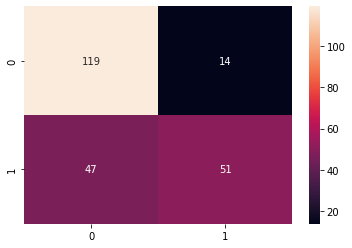

In [104]:
import seaborn as sns

sns.heatmap((confusion_matrix(y_test, predict_test)), annot=True, fmt='.5g').set_title=('Test Data')